# Run random forest classifier on top 100 and top 50 features according to ANOVA F - value ranking

In [1]:
import numpy as np
import pandas as pd

Read the cancer data into Pandas dataframe (Data is already split into x_train, y_train, x_test and y_test)

In [2]:
data = pd.read_csv("/home/seeraja/anaconda3/iitgn/datasets-master/cancer subtype classification datasetspart01/head_neck_2/methylation/methyl_after_zero_variance.csv", low_memory=False)

In [3]:
data

,Unnamed: 0,AAAS-M,AACS-M,AADAT-M,AAED1-M,AAGAB-M,AAK1-M,AAMDC-M,AAMP-M,AANAT-M,...,ZSWIM7-M,ZSWIM8-M,ZW10-M,ZWINT-M,ZXDC-M,ZYG11A-M,ZYG11B-M,ZYX-M,ZZEF1-M,ZZZ3-M
0,0,0.032548,0.019644,0.031529,0.026623,0.023774,0.022213,0.021022,0.024074,0.022467,...,0.052558,0.016148,0.020244,0.034220,0.030853,0.016933,0.145074,0.023474,0.020991,0.023185
1,1,0.026822,0.015984,0.016237,0.022432,0.021905,0.019470,0.024963,0.021150,0.014992,...,0.060409,0.013859,0.022262,0.032040,0.036064,0.328353,0.021171,0.018502,0.020986,0.027803
2,2,0.023308,0.014592,0.080124,0.024676,0.019475,0.022044,0.022564,0.019460,0.016609,...,0.067604,0.012299,0.020851,0.038137,0.064035,0.018555,0.060874,0.016466,0.021761,0.030849
3,3,0.023346,0.014332,0.021047,0.022531,0.019249,0.022003,0.014218,0.021051,0.012886,...,0.040795,0.010592,0.020974,0.035922,0.025646,0.298594,0.096735,0.014568,0.022528,0.024099
4,4,0.029347,0.015822,0.017042,0.025958,0.017184,0.020531,0.019615,0.020664,0.019219,...,0.035241,0.015076,0.021337,0.032470,0.021827,0.012323,0.014445,0.017886,0.018822,0.024582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,0.029961,0.017323,0.012091,0.022243,0.021372,0.022003,0.019497,0.021648,0.024316,...,0.041921,0.016293,0.018935,0.028977,0.026288,0.014124,0.058720,0.015568,0.018142,0.024336
111,111,0.037367,0.025722,0.065418,0.028280,0.022520,0.028332,0.029827,0.022756,0.023088,...,0.052322,0.018835,0.022897,0.037415,0.031051,0.020243,0.082134,0.022863,0.022130,0.033970
112,112,0.027386,0.016685,0.073422,0.021369,0.024767,0.024152,0.022124,0.022584,0.017363,...,0.043808,0.014066,0.027487,0.038417,0.040538,0.024058,0.020451,0.025344,0.023935,0.034050
113,113,0.029970,0.018168,0.017234,0.028162,0.026124,0.022844,0.022871,0.022608,0.020652,...,0.051360,0.014977,0.021208,0.031242,0.023896,0.013649,0.077867,0.019447,0.020155,0.029925


In [4]:
data=data.drop(columns=["Unnamed: 0"])

In [5]:
data

,AAAS-M,AACS-M,AADAT-M,AAED1-M,AAGAB-M,AAK1-M,AAMDC-M,AAMP-M,AANAT-M,AAR2-M,...,ZSWIM7-M,ZSWIM8-M,ZW10-M,ZWINT-M,ZXDC-M,ZYG11A-M,ZYG11B-M,ZYX-M,ZZEF1-M,ZZZ3-M
0,0.032548,0.019644,0.031529,0.026623,0.023774,0.022213,0.021022,0.024074,0.022467,0.015985,...,0.052558,0.016148,0.020244,0.034220,0.030853,0.016933,0.145074,0.023474,0.020991,0.023185
1,0.026822,0.015984,0.016237,0.022432,0.021905,0.019470,0.024963,0.021150,0.014992,0.018018,...,0.060409,0.013859,0.022262,0.032040,0.036064,0.328353,0.021171,0.018502,0.020986,0.027803
2,0.023308,0.014592,0.080124,0.024676,0.019475,0.022044,0.022564,0.019460,0.016609,0.014199,...,0.067604,0.012299,0.020851,0.038137,0.064035,0.018555,0.060874,0.016466,0.021761,0.030849
3,0.023346,0.014332,0.021047,0.022531,0.019249,0.022003,0.014218,0.021051,0.012886,0.010666,...,0.040795,0.010592,0.020974,0.035922,0.025646,0.298594,0.096735,0.014568,0.022528,0.024099
4,0.029347,0.015822,0.017042,0.025958,0.017184,0.020531,0.019615,0.020664,0.019219,0.012792,...,0.035241,0.015076,0.021337,0.032470,0.021827,0.012323,0.014445,0.017886,0.018822,0.024582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.029961,0.017323,0.012091,0.022243,0.021372,0.022003,0.019497,0.021648,0.024316,0.017585,...,0.041921,0.016293,0.018935,0.028977,0.026288,0.014124,0.058720,0.015568,0.018142,0.024336
111,0.037367,0.025722,0.065418,0.028280,0.022520,0.028332,0.029827,0.022756,0.023088,0.034573,...,0.052322,0.018835,0.022897,0.037415,0.031051,0.020243,0.082134,0.022863,0.022130,0.033970
112,0.027386,0.016685,0.073422,0.021369,0.024767,0.024152,0.022124,0.022584,0.017363,0.017955,...,0.043808,0.014066,0.027487,0.038417,0.040538,0.024058,0.020451,0.025344,0.023935,0.034050
113,0.029970,0.018168,0.017234,0.028162,0.026124,0.022844,0.022871,0.022608,0.020652,0.015272,...,0.051360,0.014977,0.021208,0.031242,0.023896,0.013649,0.077867,0.019447,0.020155,0.029925


Read the ANOVA F - value rankings of the features into a pandas dataframe which is saved from the previous code

In [7]:
data_rank = pd.read_csv("/home/seeraja/anaconda3/iitgn/datasets-master/cancer subtype classification datasetspart01/head_neck_2/methylation/methyl_fanova_feature_ranking_new.csv", low_memory=False)

In [8]:
data_rank

,Unnamed: 0,Feature_Name,Score
0,5063,HOXD12-M,1.726931e+02
1,9169,RGS22-M,1.677453e+02
2,2115,CHAT-M,1.528923e+02
3,12696,ZNF135-M,1.511970e+02
4,3748,FAM135B-M,1.495920e+02
...,...,...,...
13111,8608,PRR5L-M,2.732179e-07
13112,5358,IP6K1-M,1.253009e-07
13113,1375,C1orf145-M,1.200494e-07
13114,10847,STYX-M,9.251063e-08


Convert to numpy array

In [9]:
arr_rank=data_rank.values

In [10]:
arr_rank[:,1]

array(['HOXD12-M', 'RGS22-M', 'CHAT-M', ..., 'C1orf145-M', 'STYX-M',
       'MRPS27-M'], dtype=object)

Reindex the data (x_train) according to the ranking of the features in order to select the top features

In [11]:
data_re=data.reindex(columns=arr_rank[:,1])

In [12]:
data_re

,HOXD12-M,RGS22-M,CHAT-M,ZNF135-M,FAM135B-M,VSX1-M,SLC25A2-M,NKAPL-M,SCT-M,TSPYL5-M,...,PPARD-M,HSPH1-M,CLCN5-M,MAGOH-M,SLFN12L-M,PRR5L-M,IP6K1-M,C1orf145-M,STYX-M,MRPS27-M
0,0.141912,0.134778,0.142420,0.119061,0.153977,0.041374,0.463775,0.042184,0.156662,0.012758,...,0.026024,0.031767,0.026251,0.050363,0.037436,0.039025,0.023913,0.022817,0.024472,0.033872
1,0.626788,0.656813,0.605732,0.632026,0.609377,0.613493,0.688042,0.597939,0.728532,0.549389,...,0.025463,0.036841,0.022976,0.034078,0.533476,0.050076,0.019407,0.016293,0.021783,0.029375
2,0.592139,0.529216,0.508557,0.591874,0.528941,0.348721,0.727605,0.511942,0.701286,0.563421,...,0.016289,0.036857,0.024820,0.068996,0.016679,0.035996,0.019724,0.016604,0.023263,0.029192
3,0.388185,0.356379,0.287549,0.471086,0.419271,0.422668,0.695491,0.455490,0.666099,0.368983,...,0.013000,0.023508,0.016905,0.040963,0.015388,0.033107,0.016705,0.013571,0.019906,0.020981
4,0.716455,0.699167,0.678238,0.530168,0.604166,0.566811,0.889522,0.779639,0.854088,0.510812,...,0.022631,0.025131,0.022219,0.025921,0.019590,0.033102,0.019738,0.017880,0.020177,0.023880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.061443,0.045347,0.092519,0.038148,0.029730,0.017274,0.436293,0.028006,0.353605,0.009915,...,0.022996,0.029633,0.483476,0.052514,0.025568,0.032003,0.017688,0.018718,0.022684,0.023118
111,0.389883,0.202311,0.283463,0.349417,0.290501,0.142147,0.675782,0.167513,0.291021,0.089729,...,0.029550,0.029169,0.032386,0.066459,0.025532,0.046025,0.027691,0.030499,0.031022,0.027421
112,0.506278,0.510367,0.495587,0.557829,0.502988,0.432805,0.776588,0.325509,0.710205,0.536632,...,0.031941,0.036560,0.029176,0.075592,0.017520,0.030199,0.019940,0.027697,0.026037,0.043683
113,0.179598,0.123021,0.199050,0.139788,0.227839,0.034683,0.475128,0.075712,0.087972,0.021195,...,0.024947,0.032864,0.027580,0.068177,0.021151,0.035897,0.024132,0.026265,0.023032,0.026627


Select top 100 features

In [13]:
data_100=data_re.iloc[:, :100]

In [14]:
data_100

,HOXD12-M,RGS22-M,CHAT-M,ZNF135-M,FAM135B-M,VSX1-M,SLC25A2-M,NKAPL-M,SCT-M,TSPYL5-M,...,NPFFR1-M,SIM1-M,GAL3ST3-M,PCDHGB4-M,ANKRD30B-M,PCDHGB6-M,SORCS1-M,C9orf84-M,GRIN2B-M,MAGI2-M
0,0.141912,0.134778,0.142420,0.119061,0.153977,0.041374,0.463775,0.042184,0.156662,0.012758,...,0.058351,0.079396,0.101252,0.116279,0.258999,0.076851,0.025653,0.891899,0.062165,0.039967
1,0.626788,0.656813,0.605732,0.632026,0.609377,0.613493,0.688042,0.597939,0.728532,0.549389,...,0.578435,0.591310,0.550508,0.636656,0.503110,0.468015,0.567462,0.398987,0.360528,0.595399
2,0.592139,0.529216,0.508557,0.591874,0.528941,0.348721,0.727605,0.511942,0.701286,0.563421,...,0.252776,0.501390,0.438418,0.325641,0.519160,0.488172,0.542869,0.472625,0.250029,0.220686
3,0.388185,0.356379,0.287549,0.471086,0.419271,0.422668,0.695491,0.455490,0.666099,0.368983,...,0.454097,0.447936,0.431476,0.397126,0.362798,0.462440,0.054114,0.690105,0.281169,0.294152
4,0.716455,0.699167,0.678238,0.530168,0.604166,0.566811,0.889522,0.779639,0.854088,0.510812,...,0.544429,0.016322,0.593359,0.688821,0.494975,0.029068,0.662061,0.266867,0.323075,0.646329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.061443,0.045347,0.092519,0.038148,0.029730,0.017274,0.436293,0.028006,0.353605,0.009915,...,0.022935,0.022131,0.084732,0.076709,0.201438,0.077126,0.021039,0.918319,0.038453,0.021642
111,0.389883,0.202311,0.283463,0.349417,0.290501,0.142147,0.675782,0.167513,0.291021,0.089729,...,0.122812,0.181363,0.205120,0.258345,0.263229,0.131832,0.158034,0.822218,0.139089,0.161619
112,0.506278,0.510367,0.495587,0.557829,0.502988,0.432805,0.776588,0.325509,0.710205,0.536632,...,0.230943,0.478353,0.508527,0.513688,0.433899,0.414258,0.412093,0.562148,0.505892,0.465045
113,0.179598,0.123021,0.199050,0.139788,0.227839,0.034683,0.475128,0.075712,0.087972,0.021195,...,0.030557,0.090606,0.132942,0.102265,0.200691,0.065597,0.028174,0.768086,0.086707,0.049178


In [15]:
data_100.to_csv("methyl_data_100.csv")

Read the labels into pandas dataframe

In [16]:
data_y = pd.read_csv("/home/seeraja/anaconda3/iitgn/datasets-master/cancer subtype classification datasetspart01/head_neck_2/methylation/methyl_y_train.csv", low_memory=False)

In [17]:
data_y

,Unnamed: 0,0
0,0,NC
1,1,C
2,2,C
3,3,C
4,4,C
...,...,...
110,110,NC
111,111,NC
112,112,C
113,113,NC


Convert to numpy array

In [18]:
arr_y=data_y.values
y=arr_y[:,1]
y

array(['NC', 'C', 'C', 'C', 'C', 'NC', 'C', 'NC', 'NC', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'NC', 'C', 'C', 'NC', 'C', 'C', 'C', 'NC',
       'C', 'C', 'C', 'C', 'NC', 'C', 'C', 'C', 'C', 'NC', 'C', 'C', 'C',
       'NC', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'NC', 'C', 'C', 'NC', 'C',
       'C', 'C', 'C', 'C', 'NC', 'NC', 'C', 'C', 'C', 'C', 'NC', 'C',
       'NC', 'C', 'NC', 'C', 'C', 'C', 'C', 'C', 'C', 'NC', 'C', 'NC',
       'NC', 'C', 'C', 'C', 'C', 'NC', 'C', 'C', 'C', 'C', 'C', 'NC', 'C',
       'C', 'C', 'C', 'C', 'C', 'NC', 'NC', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'NC', 'C', 'C', 'NC', 'C', 'NC', 'C', 'NC', 'NC', 'NC', 'C',
       'NC', 'NC'], dtype=object)

Create the grid for RandomizedSearchCV

In [19]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100,200,500,1000, 1500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,15,20,30,40,50,70]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
random_grid

{'n_estimators': [100, 200, 500, 1000, 1500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 30, 40, 50, 70, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

Using Random forest classifier

In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_100 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random_100.fit(data_100, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 30, 40, 50,
                                                      70, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         1500]},
                   random_state=42, verbose=2)

In [22]:
rf_random_100.best_score_

0.9568151147098516

In [23]:
rf_random_100.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

Get the best model and save it

In [24]:
best_random_100=rf_random_100.best_estimator_

In [25]:
# save the model to disk
import pickle
filename = 'methyl_head_neck_f_score_100.sav'
pickle.dump(best_random_100, open(filename, 'wb'))

Global explainability using SHAP values

In [26]:
import shap

In [27]:
shap_values = shap.TreeExplainer(best_random_100).shap_values(data_100)

In [ ]:
Plot the 

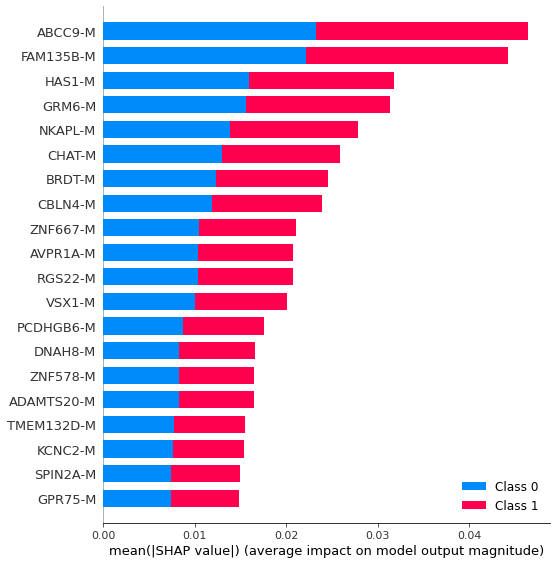

In [28]:
shap.summary_plot(shap_values, data_100, plot_type="bar")

Select top 50 features

In [29]:
# 50 features
data_50=data_re.iloc[:, :50]

In [30]:
data_50

,HOXD12-M,RGS22-M,CHAT-M,ZNF135-M,FAM135B-M,VSX1-M,SLC25A2-M,NKAPL-M,SCT-M,TSPYL5-M,...,TAC1-M,FOXD2-M,FSIP2-M,C11orf85-M,CNTNAP5-M,BRDT-M,UPB1-M,ABCC9-M,NKX2-6-M,GPR75-M
0,0.141912,0.134778,0.142420,0.119061,0.153977,0.041374,0.463775,0.042184,0.156662,0.012758,...,0.044016,0.156466,0.127881,0.137578,0.053442,0.857156,0.223215,0.038085,0.099000,0.542801
1,0.626788,0.656813,0.605732,0.632026,0.609377,0.613493,0.688042,0.597939,0.728532,0.549389,...,0.722118,0.081878,0.568724,0.574380,0.597178,0.357269,0.627574,0.591194,0.658645,0.783284
2,0.592139,0.529216,0.508557,0.591874,0.528941,0.348721,0.727605,0.511942,0.701286,0.563421,...,0.406377,0.513245,0.512939,0.489547,0.447579,0.589776,0.637045,0.421483,0.522902,0.803026
3,0.388185,0.356379,0.287549,0.471086,0.419271,0.422668,0.695491,0.455490,0.666099,0.368983,...,0.462410,0.679740,0.344926,0.389988,0.384848,0.660071,0.569051,0.346517,0.385798,0.682688
4,0.716455,0.699167,0.678238,0.530168,0.604166,0.566811,0.889522,0.779639,0.854088,0.510812,...,0.343988,0.797152,0.731720,0.614212,0.725493,0.851108,0.733592,0.681634,0.718258,0.912710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.061443,0.045347,0.092519,0.038148,0.029730,0.017274,0.436293,0.028006,0.353605,0.009915,...,0.032484,0.086397,0.051222,0.099888,0.020594,0.886635,0.371877,0.033261,0.053492,0.503264
111,0.389883,0.202311,0.283463,0.349417,0.290501,0.142147,0.675782,0.167513,0.291021,0.089729,...,0.195016,0.261259,0.268194,0.272203,0.251933,0.864184,0.397875,0.073982,0.248993,0.559014
112,0.506278,0.510367,0.495587,0.557829,0.502988,0.432805,0.776588,0.325509,0.710205,0.536632,...,0.603587,0.532860,0.484680,0.527695,0.543991,0.606206,0.564355,0.451790,0.403191,0.773820
113,0.179598,0.123021,0.199050,0.139788,0.227839,0.034683,0.475128,0.075712,0.087972,0.021195,...,0.100131,0.123349,0.203777,0.235049,0.077241,0.861172,0.256494,0.042774,0.134399,0.431821


In [31]:
# 50 fetaures
rf_random_50 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random_50.fit(data_50, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 30, 40, 50,
                                                      70, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         1500]},
                   random_state=42, verbose=2)

In [32]:
rf_random_50.best_score_

0.9653621232568601

In [33]:
rf_random_50.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [34]:
best_random_50=rf_random_50.best_estimator_

In [35]:
# save the model to disk
#import pickle
filename = 'methyl_head_neck_f_score_50.sav'
pickle.dump(best_random_50, open(filename, 'wb'))

In [36]:
shap_values_50 = shap.TreeExplainer(best_random_50).shap_values(data_50)

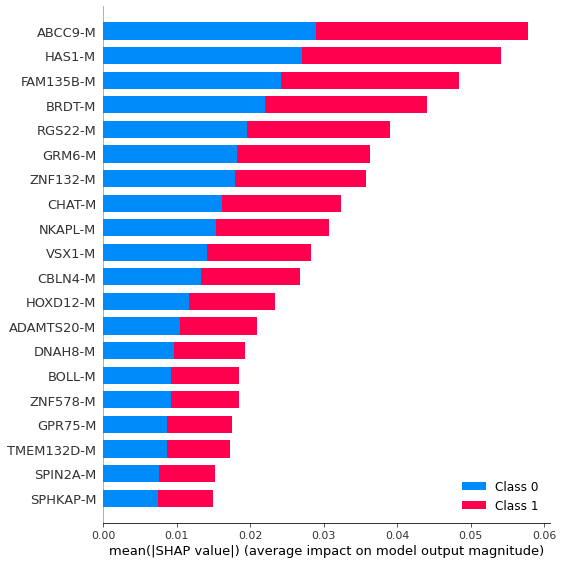

In [37]:
shap.summary_plot(shap_values_50, data_50, plot_type="bar")